# Random Forest Model

### 1. Loading and Preprocessing Data

In [2]:
# Initial imports

import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [3]:
# Loading data

Model_df= pd.read_csv("Resources/Model_data.csv")
Model_df.head()

,Language,Countries,Degree of endangerment,Number of speakers,Endangerment_Level
0,kede,Angola,Extinct,0,5
1,munji,Afghanistan,Severely endangered,2000,3
2,chru,Viet Nam,Vulnerable,12000,1
3,parachi,Afghanistan,Definitely endangered,6000,2
4,bolo,Angola,Definitely endangered,2627,2


In [4]:
# One-hot encoding for categorical variables

encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(Model_df[['Language', 'Countries',]])

# Create a DataFrame for encoded columns

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Language', 'Countries']))

# Combine the encoded columns with the original numerical data

df_final = pd.concat([Model_df[['Number of speakers']], encoded_df], axis=1)


In [5]:
# Define features set

X = df_final
X.head()

,Number of speakers,Language_acheron,Language_ahom,Language_algherese catalan,Language_amami,Language_amanay,Language_amba,Language_amharic,Language_andoa,Language_andro,...,Countries_Yemen,Countries_indonesia,Countries_iran,Countries_italy,Countries_japan,Countries_korea,Countries_nigeria,Countries_telugu,Countries_turkey,Countries_vietnam
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Define target vector

y = Model_df['Degree of endangerment']
y

0                    Extinct
1        Severely endangered
2                 Vulnerable
3      Definitely endangered
4      Definitely endangered
               ...          
442                     Safe
443                     Safe
444                     Safe
445                     Safe
446                     Safe
Name: Degree of endangerment, Length: 447, dtype: object

In [7]:
# Splitting into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Creating StandardScaler instance

scaler = StandardScaler()

In [9]:
# Fitting Standard Scaller

X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### 2. Fitting the Random Forest Model

In [11]:
# Create a random forest classifier

model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
# Fitting the model

model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=78)

### 3. Making Predictions Using the Random Forest Model

In [13]:
# Making predictions using the testing data

predictions = model.predict(X_test_scaled)

### 4. Evaluating the model

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.75
Precision: 0.6604516806722689
Recall: 0.75
F1-Score: 0.698092888471178


In [15]:
# Calculating the confusion matrix

import numpy as np

cm = confusion_matrix(y_test, predictions)

unique_classes = np.unique(y_test)
print("Unique classes in y_test:", unique_classes)
print("Confusion matrix shape:", cm.shape)


Unique classes in y_test: ['Critically endangered' 'Definitely endangered' 'Extinct' 'Safe'
 'Severely endangered' 'Vulnerable']
Confusion matrix shape: (6, 6)


In [16]:
# Dynamically adjusting the labels to match the number of unique classes

class_labels = [f"Actual {label}" for label in unique_classes]
cm_df = pd.DataFrame(cm, index=class_labels, columns=[f"Predicted {label}" for label in unique_classes])


In [17]:
# Calculating the accuracy score

acc_score = accuracy_score(y_test, predictions)

In [18]:
# Displaying results

print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Critically endangered,Predicted Definitely endangered,Predicted Extinct,Predicted Safe,Predicted Severely endangered,Predicted Vulnerable
Actual Critically endangered,23,0,0,0,0,0
Actual Definitely endangered,4,22,0,0,3,1
Actual Extinct,0,0,26,0,0,0
Actual Safe,0,0,0,13,0,0
Actual Severely endangered,3,4,0,0,0,0
Actual Vulnerable,4,8,0,0,1,0


Accuracy Score : 0.75
Classification Report
                       precision    recall  f1-score   support

Critically endangered       0.68      1.00      0.81        23
Definitely endangered       0.65      0.73      0.69        30
              Extinct       1.00      1.00      1.00        26
                 Safe       1.00      1.00      1.00        13
  Severely endangered       0.00      0.00      0.00         7
           Vulnerable       0.00      0.00      0.00        13

             accuracy                           0.75       112
            macro avg       0.55      0.62      0.58       112
         weighted avg       0.66      0.75      0.70       112



### 5. Calculating and visualizing the Feature Importance

In [19]:
# Random Forests in sklearn will automatically calculate feature importance

importances = model.feature_importances_

# We can sort the features by their importance

sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.3582797960024054, 'Number of speakers'),
 (0.02790346975437799, 'Countries_Indonesia'),
 (0.02482884371555061, 'Countries_Many'),
 (0.014629698665240548, 'Countries_Italy'),
 (0.01108041349843875, 'Countries_India'),
 (0.006701463135616857, 'Countries_Japan'),
 (0.006103518854078963, 'Countries_Cameroon'),
 (0.005286775959553612, 'Countries_Nigeria'),
 (0.005282420784870992, 'Countries_Russia'),
 (0.004720782205443782, 'Countries_Mexico'),
 (0.004395689607277614, 'Countries_China'),
 (0.004251586143002347, 'Countries_Botswana'),
 (0.004062043369558354, 'Countries_Canada'),
 (0.004038046256677449, 'Countries_Brazil'),
 (0.004017488682838712, 'Language_isirawa'),
 (0.00390667425079719, 'Countries_Chad'),
 (0.003890350928022193, 'Countries_Ethiopia'),
 (0.003818459205367513, 'Countries_South Africa'),
 (0.0037230821829315635, 'Language_salento'),
 (0.0036613075289403385, 'Language_helong'),
 (0.0034265975900230113, 'Language_taje'),
 (0.0032101276255443, 'Language_karbi'),
 (0.0031085

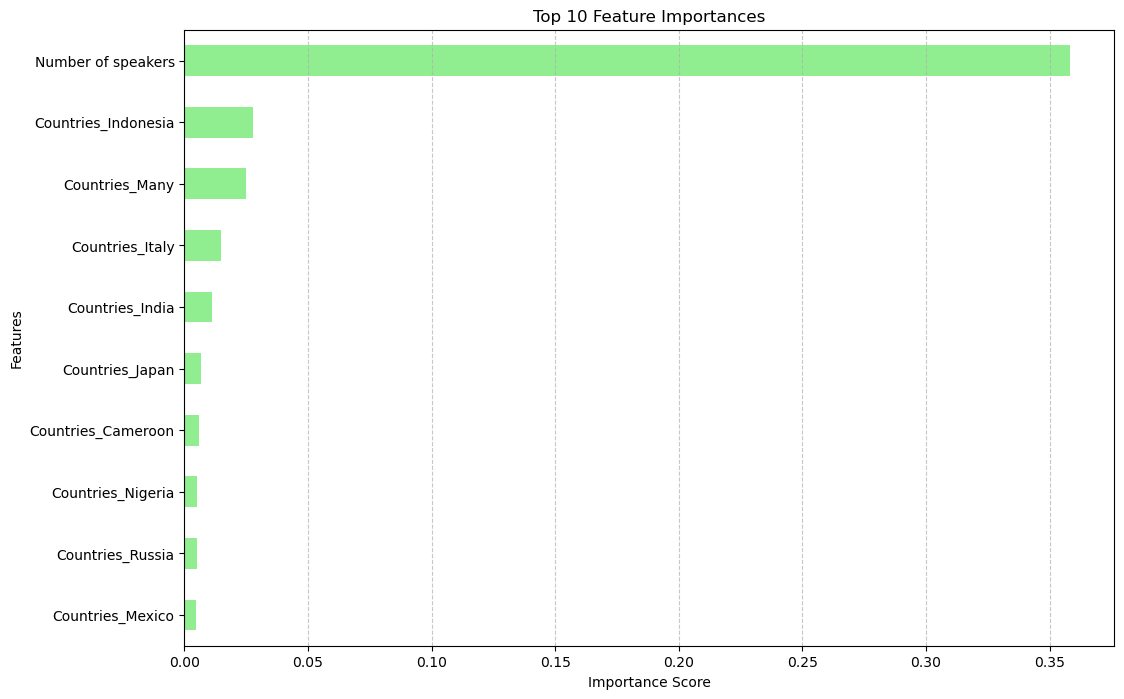

In [20]:
import matplotlib.pyplot as plt

# Create a DataFrame with feature importances

importances_df = pd.DataFrame(
    sorted(zip(model.feature_importances_, X.columns), reverse=True),
    columns=["Feature Importance", "Feature"]
)

# Set the feature names as the index

importances_df.set_index("Feature", inplace=True)

# Select the top 10 most important features

top_n = 10 
importances_sorted = importances_df.head(top_n).sort_values(by="Feature Importance")

# Plot the feature importances

plt.figure(figsize=(12, 8)) 
importances_sorted["Feature Importance"].plot(kind="barh", color="lightgreen")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.7) 
plt.show()


### 6. Saving the model

In [21]:
# Save the trained model  

import joblib 
joblib.dump(model, "Resources/RandomForest_model.pkl")

['Resources/RandomForest_model.pkl']

### 7. Optimizing the model: Hyperparameter Tuning using "GridSearchCV"

In [30]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Run GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1_weighted", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [31]:
# Train model with best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


                       precision    recall  f1-score   support

Critically endangered       0.70      1.00      0.82        23
Definitely endangered       0.62      0.70      0.66        30
              Extinct       1.00      1.00      1.00        26
                 Safe       1.00      1.00      1.00        13
  Severely endangered       0.00      0.00      0.00         7
           Vulnerable       0.00      0.00      0.00        13

             accuracy                           0.74       112
            macro avg       0.55      0.62      0.58       112
         weighted avg       0.66      0.74      0.69       112



Conclusion: The lower accuracy after applying GridSearchCV suggests that the hyperparameters chosen during the search might not be optimal for this specific dataset. In this case, exploring other hyperparameters or testing different classification models might be needed to improve the performance.